In [1]:
#导入所需要的模块

#防止matplotlib画图服务器挂掉
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#处理数据集
import numpy as np
import pandas as pd

#画图
import matplotlib.pyplot as plt
import seaborn as sns

#输出显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "C:\Windows\Fonts\simkai.ttf") #中文字体为楷体 常规

#数据可视化
import torchvision
import torchvision.transforms as transforms

D:\Anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#导入数据集
df = pd.read_csv("datasets/label_cutword.csv")

In [4]:
df

,label,cutword
0,1,更博 爆照 帅 越来越 爱 生快 傻 缺
1,1,土耳其 事要 认真对待 开除 细心 酒店
2,1,姑娘 羡慕 招财猫 学徒 一枚 明天 大佬 范儿
3,1,美
4,1,梦想 舞台
...,...,...
113649,0,公里 不到 县 医院 天桥 下右 拐 米 太 霸道 远 点 真心 找 吃 下次 记到 吃
113650,0,真冷 穿 棉袄 春天 真的 百变 莫测
113651,0,几天 停止
113652,0,很惨


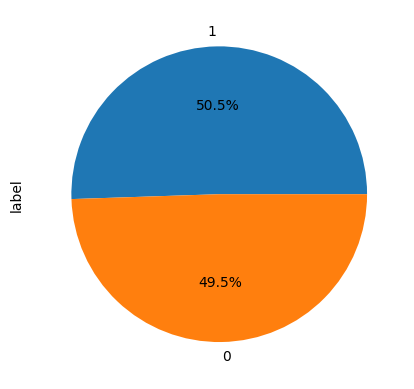

In [5]:
#绘制情感极性数量饼图
df.label.value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

In [6]:
print(df.shape)

(113654, 2)


In [7]:
print(df.groupby("label").count())

       cutword
label         
0        56228
1        57426


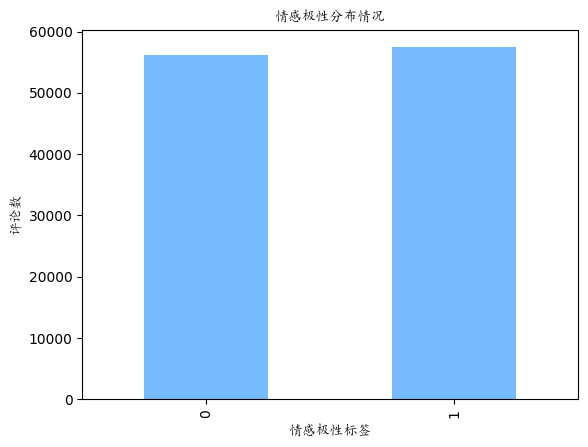

In [8]:
#绘制情感极性数量条形图
#fig = plt.figure()
df.groupby('label').cutword.count().plot.bar(facecolor='xkcd:sky blue')
# 显示横轴标签
plt.xlabel("情感极性标签", fontproperties=fonts)
# 显示纵轴标签
plt.ylabel("评论数", fontproperties=fonts)
# 显示图标题
plt.title("情感极性分布情况", fontproperties=fonts)
plt.show()

In [9]:
df.sample(20)

,label,cutword
10102,1,一流 教学 环境 一流 老师 值得 期待 爱 风光 摄影 报名 真的 快速 提升 证人
83911,0,天道酬勤 衷心 祝贺 太 感人
36890,1,一盏 阿胶 扶元 固本 享 太平 收到 山东 特产 开森 谢谢 小伙伴 收到
97999,0,看着 好吃 北京 开店
20103,1,花 名 丛生 福禄考
53834,1,美的 帅 不错 哥 几个 领导人 拍得 漂亮
25495,1,下一阶段 治疗 打气 胜利
21132,1,a kiss 狮子 太 兴奋 easy 加州 allstar
86996,0,皿 裂头 蚴 刚学过 曼氏 迭宫 绦虫 幼虫 青蛙 宿主 寄生 青蛙 肌肉 中 看过 标本 ...
26702,1,曲子 揭晓


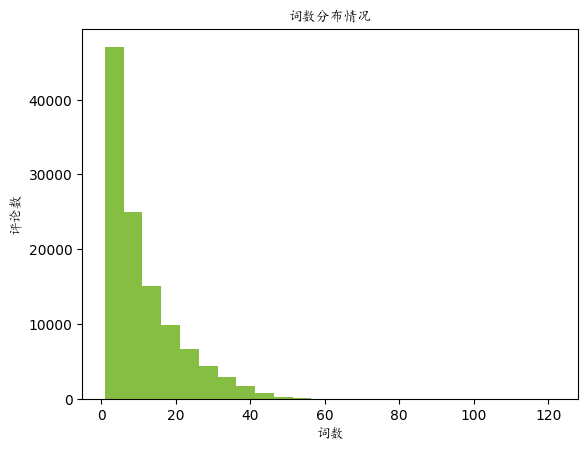

In [10]:
#定义词数统计函数
def wcount(text):
    return len(text.split())

x = df['cutword'].map(wcount)
#绘制评论词数统计直方图
plt.hist(x, bins=24, facecolor='xkcd:leaf green', alpha=0.75)
# 显示横轴标签
plt.xlabel("词数", fontproperties=fonts)
# 显示纵轴标签
plt.ylabel("评论数", fontproperties=fonts)
# 显示图标题
plt.title("词数分布情况", fontproperties=fonts)
plt.show()